In [1]:
import pandas as pd
from random import choice
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import get_named_colors_mapping
import matplotlib.animation as animation
from IPython.display import HTML
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [3]:
data=pd.read_csv(url)

In [4]:
#data = pd.read_csv("./inputs/owid-covid-data.csv")

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85999 entries, 0 to 85998
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               85999 non-null  object 
 1   continent                              81852 non-null  object 
 2   location                               85999 non-null  object 
 3   date                                   85999 non-null  object 
 4   total_cases                            83868 non-null  float64
 5   new_cases                              83866 non-null  float64
 6   new_cases_smoothed                     82865 non-null  float64
 7   total_deaths                           74172 non-null  float64
 8   new_deaths                             74330 non-null  float64
 9   new_deaths_smoothed                    82865 non-null  float64
 10  total_cases_per_million                83415 non-null  float64
 11  ne

In [7]:
data2 = data[["location","date","total_cases"]]

In [8]:
data2[["date"]]= data2[["date"]].apply(pd.to_datetime)

In [9]:
data2.info(),data2.date.min()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85999 entries, 0 to 85998
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     85999 non-null  object        
 1   date         85999 non-null  datetime64[ns]
 2   total_cases  83868 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.0+ MB


(None, Timestamp('2020-01-01 00:00:00'))

In [10]:
data2["days"] = ((data2["date"]-data2.date.min()).astype(int)/10e8)/86400

In [11]:
data2.head()

,location,date,total_cases,days
0,Afghanistan,2020-02-24,1.0,54.0
1,Afghanistan,2020-02-25,1.0,55.0
2,Afghanistan,2020-02-26,1.0,56.0
3,Afghanistan,2020-02-27,1.0,57.0
4,Afghanistan,2020-02-28,1.0,58.0


In [12]:
data2.days.max()

490.0

In [13]:
data2.dtypes

location               object
date           datetime64[ns]
total_cases           float64
days                  float64
dtype: object

In [14]:
data2["day"] = data2['date'].map(lambda x: x.day)
data2["month"] = data2['date'].map(lambda x: x.month)
data2["year"] = data2['date'].map(lambda x: x.year)
data2.head()

,location,date,total_cases,days,day,month,year
0,Afghanistan,2020-02-24,1.0,54.0,24,2,2020
1,Afghanistan,2020-02-25,1.0,55.0,25,2,2020
2,Afghanistan,2020-02-26,1.0,56.0,26,2,2020
3,Afghanistan,2020-02-27,1.0,57.0,27,2,2020
4,Afghanistan,2020-02-28,1.0,58.0,28,2,2020


In [15]:
data2= data2.drop(columns=["date","year"], index=1)

In [16]:
data2.head()

,location,total_cases,days,day,month
0,Afghanistan,1.0,54.0,24,2
2,Afghanistan,1.0,56.0,26,2
3,Afghanistan,1.0,57.0,27,2
4,Afghanistan,1.0,58.0,28,2
5,Afghanistan,1.0,59.0,29,2


In [17]:
#data2.set_index("location")
#data2.head()
data2 = data2.groupby(["location", "days"], as_index= False).sum()

In [18]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
85993,Zimbabwe,485.0,38257.0,30,4
85994,Zimbabwe,486.0,38260.0,1,5
85995,Zimbabwe,487.0,38281.0,2,5
85996,Zimbabwe,488.0,38293.0,3,5


In [19]:
data2.columns

Index(['location', 'days', 'total_cases', 'day', 'month'], dtype='object')

In [20]:
data2.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            85988, 85989, 85990, 85991, 85992, 85993, 85994, 85995, 85996,
            85997],
           dtype='int64', length=85998)

In [21]:
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
85993,Zimbabwe,485.0,38257.0,30,4
85994,Zimbabwe,486.0,38260.0,1,5
85995,Zimbabwe,487.0,38281.0,2,5
85996,Zimbabwe,488.0,38293.0,3,5


In [22]:
data2 = data2[~data2["location"].str.contains("World")]
data2

,location,days,total_cases,day,month
0,Afghanistan,54.0,1.0,24,2
1,Afghanistan,56.0,1.0,26,2
2,Afghanistan,57.0,1.0,27,2
3,Afghanistan,58.0,1.0,28,2
4,Afghanistan,59.0,1.0,29,2
...,...,...,...,...,...
85993,Zimbabwe,485.0,38257.0,30,4
85994,Zimbabwe,486.0,38260.0,1,5
85995,Zimbabwe,487.0,38281.0,2,5
85996,Zimbabwe,488.0,38293.0,3,5


In [23]:
data2.days.max()

490.0

,location,days,total_cases,day,month
79334,Turkey,150.0,163103.0,30,5
35479,India,150.0,181827.0,30,5
29939,Germany,150.0,183189.0,30,5
28210,France,150.0,190744.0,30,5
38674,Italy,150.0,232664.0,30,5
72871,Spain,150.0,239228.0,30,5
81186,United Kingdom,150.0,256469.0,30,5
63855,Russia,150.0,396575.0,30,5
11121,Brazil,150.0,498440.0,30,5
71547,South America,150.0,868854.0,30,5


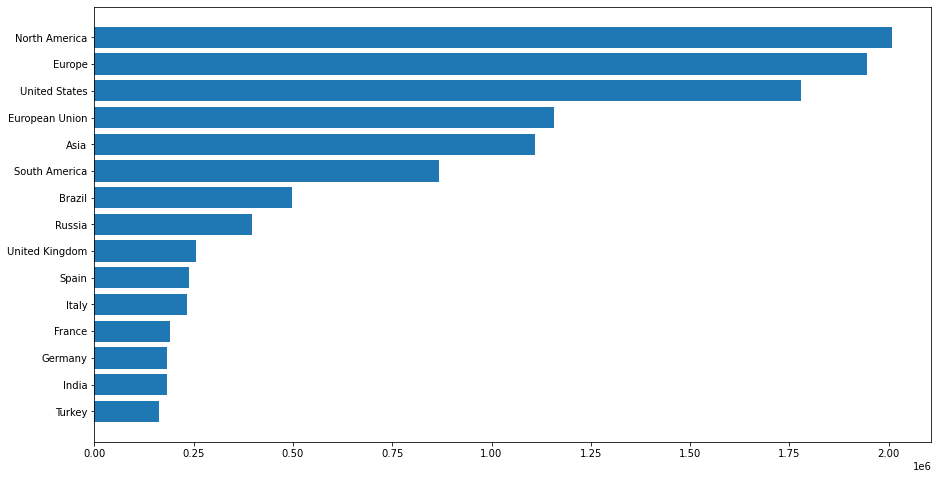

In [24]:
current_days=150
dff=(data2[data2.days.eq(current_days)].sort_values(by='total_cases', ascending=True).tail(15))
#dff[dff.location=="World"]


display(dff)

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(dff.location, dff.total_cases);

In [25]:
countries = list(set(data2.location.tolist()))
values = get_named_colors_mapping().values()

values_list = list(values)

AttributeError: 'float' object has no attribute 'astype'

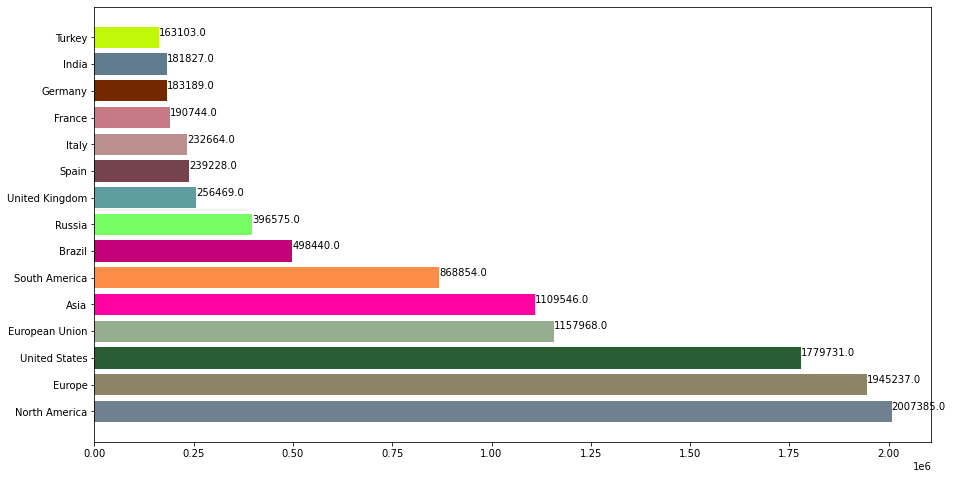

In [26]:
colors=dict(zip(countries,
                [choice(values_list)for x in countries]))

fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   

ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])

for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'])):
    #ax.text(value, i,     name,            ha='right')  
    ax.text(value, i,     value,           ha='left',va='bottom')   

ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')

AttributeError: 'float' object has no attribute 'astype'

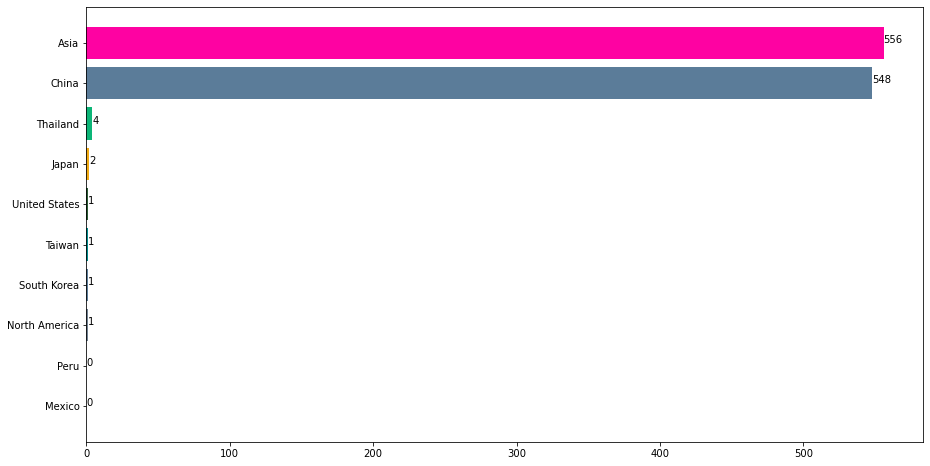

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchar(day):
    dff=(data2[data2.days.eq(day)].sort_values(by='total_cases', ascending=True).tail(10))
    ax.clear()
    ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])
    
    for i, (name, value) in enumerate(zip(dff['location'], dff['total_cases'].astype(int))):
        #ax.text(value, i,     name,            ha='right')  
        ax.text(value, i,     value,           ha='left')   

    
    ax.text(1, 0.4, datetime.date(1900, dff['month'].mean().astype(int), 1).strftime('%B'), transform=ax.transAxes, size=46, ha='right')
    #ax.text(1, 0.4, month, transform=ax.transAxes, size=46, ha='right')
    ax.set_title('Coronavirus cases by country', fontdict={'fontsize': 30})
    plt.box(False)
    
draw_barchar(21)

In [28]:
'''
fig, ax = plt.subplots(figsize=(15, 8))

animator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))

HTML(animator.to_jshtml()) 
animator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)
animator.save('outputs/race.gif', writer='imagemagick')
'''

'\nfig, ax = plt.subplots(figsize=(15, 8))\n\nanimator = animation.FuncAnimation(fig, draw_barchar, frames=range(20, data2.days.max().astype(int)))\n\nHTML(animator.to_jshtml()) \nanimator.save("outputs/Racing Bar Chart.mp4", fps = 10, bitrate = 10000)\nanimator.save(\'outputs/race.gif\', writer=\'imagemagick\')\n'

In [29]:
data = data[~data["location"].str.contains("World")]
data = data[~data["location"].str.contains("International")]
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85994,ZWE,Africa,Zimbabwe,2021-04-30,38257.0,22.0,30.286,1567.0,0.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85995,ZWE,Africa,Zimbabwe,2021-05-01,38260.0,3.0,28.000,1568.0,1.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85996,ZWE,Africa,Zimbabwe,2021-05-02,38281.0,21.0,27.857,1570.0,2.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85997,ZWE,Africa,Zimbabwe,2021-05-03,38293.0,12.0,27.286,1573.0,3.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [30]:
df_values, df_ranks = bcr.prepare_long_data(data, index='date', columns=['location'],
                                            values='total_cases', steps_per_period=1)

df_values

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,59939.0,4565548.0,131185.0,122311.0,13232.0,26815.0,0.0,1232.0,2993865.0,216596.0,...,32392274.0,200908.0,91250.0,4.0,27.0,198865.0,2942.0,6325.0,91670.0,38260.0
2021-05-02,60122.0,4571597.0,131238.0,122522.0,13282.0,26993.0,0.0,1232.0,3005259.0,216863.0,...,32421641.0,202492.0,91643.0,4.0,27.0,200067.0,2962.0,6341.0,91693.0,38281.0
2021-05-03,60300.0,4578852.0,131276.0,122717.0,13295.0,27133.0,0.0,1232.0,3021179.0,217008.0,...,32472201.0,204120.0,92006.0,4.0,27.0,200931.0,2985.0,6363.0,91722.0,38293.0


In [31]:
df_ranks

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,106.0,206.0,129.0,126.0,75.0,89.0,20.0,37.0,201.0,142.0,...,214.0,139.0,115.0,23.0,26.0,138.0,45.0,58.0,116.0,98.0
2021-05-02,106.0,206.0,129.0,126.0,75.0,89.0,20.0,37.0,201.0,142.0,...,214.0,139.0,115.0,23.0,26.0,138.0,45.0,58.0,116.0,97.0
2021-05-03,106.0,206.0,129.0,126.0,75.0,89.0,20.0,37.0,201.0,142.0,...,214.0,139.0,116.0,23.0,26.0,138.0,45.0,57.0,115.0,97.0


In [32]:
'''
df_values = df_values.fillna(0)
df_values["Europe"]
df = df_values["Europe"]
df.columns
'''

'\ndf_values = df_values.fillna(0)\ndf_values["Europe"]\ndf = df_values["Europe"]\ndf.columns\n'

In [33]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=10,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=10,
                   filename='outputs/covid19_vert2.mp4')

MovieWriter ffmpeg unavailable; using Pillow instead.


Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            list index out of range
                            

In [34]:
%%time
bcr.bar_chart_race(df=df_values, n_bars=15,fixed_max=False,figsize=(5, 3),title='COVID-19 cases by Country',
                   filter_column_colors=True,orientation='h',steps_per_period=5,
                   filename='outputs/race.gif')

CPU times: user 2min 36s, sys: 12.6 s, total: 2min 48s
Wall time: 8min 27s


In [35]:
'''
import plotly.express as px

data = data.fillna(0)
fig = px.line(data, x="date", y="location", color='new_cases')
fig.show()
'''

'\nimport plotly.express as px\n\ndata = data.fillna(0)\nfig = px.line(data, x="date", y="location", color=\'new_cases\')\nfig.show()\n'

In [36]:
import ipywidgets as widgets



In [37]:
list(set(data.continent.values))

['Asia', nan, 'Europe', 'Oceania', 'Africa', 'North America', 'South America']

In [38]:
continent = widgets.Select(
    options=list(set(data.continent.values)),
    value='Europe',
    # rows=10,
    description='continent:',
    disabled=False
)

display(continent)

Select(description='continent:', index=2, options=('Asia', nan, 'Europe', 'Oceania', 'Africa', 'North America'…

In [39]:
continent.value

'Europe'

In [40]:
data[data.continent==continent.value]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
883,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
884,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
885,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
886,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
887,ALB,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83426,VAT,Europe,Vatican,2021-04-30,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
83427,VAT,Europe,Vatican,2021-05-01,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
83428,VAT,Europe,Vatican,2021-05-02,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
83429,VAT,Europe,Vatican,2021-05-03,27.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN


In [41]:
df_values2, df_ranks2 = bcr.prepare_long_data(data[data.continent==continent.value], index='date', columns=['location'],
                                            values='total_cases', steps_per_period=1)

df_values2 = df_values2.fillna(0)
df_values2

location,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czechia,...,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom,Vatican
date,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,131085.0,13232.0,618870.0,358738.0,990229.0,198461.0,404380.0,332183.0,65233.0,1630758.0,...,5066.0,689557.0,382211.0,240292.0,3524077.0,973604.0,659974.0,2124070.0,4432246.0,27.0
2021-05-01,131185.0,13232.0,620485.0,359982.0,993434.0,198461.0,404846.0,334229.0,65909.0,1632932.0,...,5066.0,690931.0,382720.0,241309.0,3524077.0,973604.0,659974.0,2132742.0,4434157.0,27.0
2021-05-02,131238.0,13282.0,622110.0,361063.0,995562.0,198461.0,405194.0,335173.0,66372.0,1634114.0,...,5066.0,691920.0,383098.0,241672.0,3524077.0,973604.0,659974.0,2137959.0,4435831.0,27.0


In [42]:
%%time
bcr.bar_chart_race(df=df_values2, n_bars=15,fixed_max=False,figsize=(5, 3),title=f'COVID-19 cases by Country in {continent.value}',
                   filter_column_colors=True,orientation='h',steps_per_period=10,
                   filename='outputs/racecountry.gif')

CPU times: user 4min 32s, sys: 21.8 s, total: 4min 54s
Wall time: 20min 8s
